# Cleaning Data

### Introduction

The data set contains information about [the avengers](https://en.wikipedia.org/wiki/Avengers_(comics).

### Exploring the Data

In [4]:
import pandas as pd

avengers = pd.read_csv("avengers.csv",encoding='latin-1')
avengers.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


### Filtering Out Bad Data

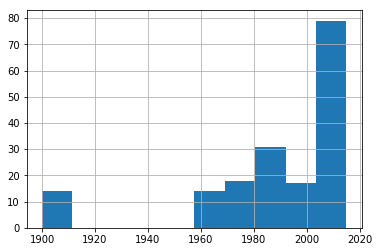

In [6]:
import matplotlib.pyplot as plt

avengers["Year"].hist()

In [12]:
true_avengers = pd.DataFrame()
true_avengers = avengers[avengers["Year"] > 1959]

### Consolidating Deaths

In [21]:
# Finging the total number of deaths each character experienced
import warnings
warnings.filterwarnings('ignore')

def num_of_deaths(row):
    cols = ['Death1', 'Death2','Death3','Death4','Death5']
    death_num = 0
    
    for col in cols:
        death = row[col]
        if death == 'NO' or pd.isnull(death):
            continue
        elif death == 'YES':
            death_num += 1
            
    return death_num

true_avengers["Death"] = true_avengers.apply(num_of_deaths, axis=1)
true_avengers["Death"].head()

0    1
1    1
2    1
3    1
4    2
Name: Death, dtype: int64

### Verifying Years Since Joining

In [25]:
# Assuming 2015 as the reference year, verify that the "Years since joining" field accurately reflects the Year column.

correct_joined_year = true_avengers["Years since joining"] ==  2015 - true_avengers["Year"]
correct_joined_year.sum()

159